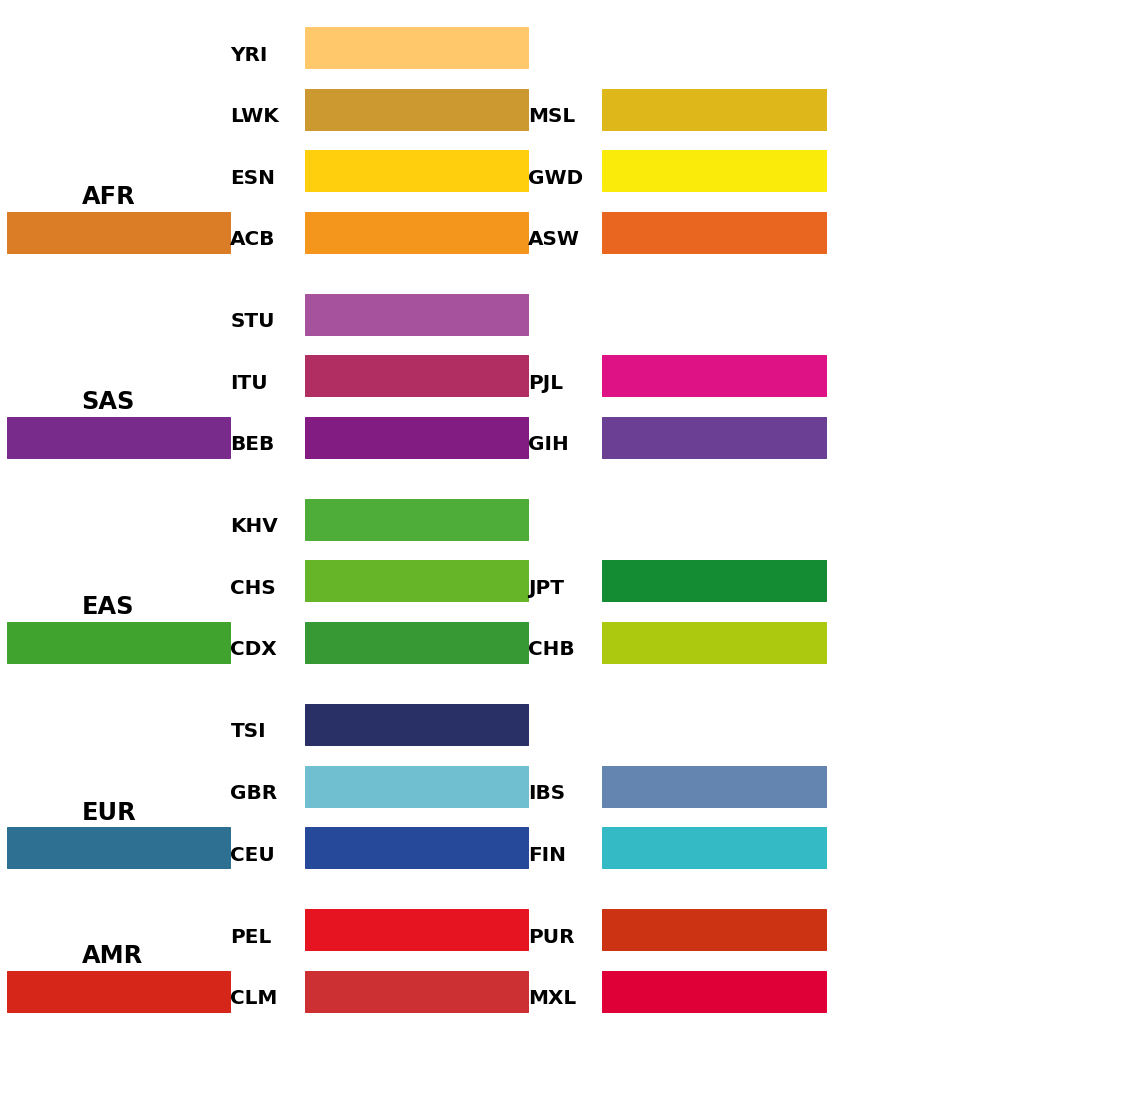

In [126]:
import os
import csv
import collections
import importlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plot_aux_module = '/home/local/work/code/github/project-diploid-assembly/notebooks/aux_mods/plot_aux.py'
plot_aux_spec = importlib.util.spec_from_file_location("plot_aux", plot_aux_module)
plot_aux = importlib.util.module_from_spec(plot_aux_spec)
plot_aux_spec.loader.exec_module(plot_aux)

samples = plot_aux.load_sample_table()
hexcodes, rgbcodes, popmap = plot_aux.load_population_annotation()

stats_path = '/home/local/work/data/hgsvc/'
out_path = os.path.join(stats_path, 'pop_legend.svg')


def plot_tagging_statistic():
    
    fig, axis = plt.subplots(figsize=(20, 20))
    
    super_pops = list(reversed(plot_aux.get_population_sorting()))
    
    box_w = 3
    box_h = 10
    jump_x = 4
    jump_y = 15
    offset_y = 5
    pop_offset_y = 5
    
    last_y_border = 0
    for sp in super_pops:
        x_border = 0
        y_border = last_y_border + jump_y + offset_y
        axis.add_patch(
            patches.Rectangle(
                xy=(x_border, y_border),
                width=box_w,
                height=box_h,
                color=rgbcodes[sp],
                fill=True,
                label=sp
            )
        )
        axis.text(
            x_border + 1,
            y_border + box_h + 2,
            s=sp,
            ha='left',
            fontdict={
                'fontsize': 24,
                'fontweight': 'bold'
            }
        )
        
        pops = sorted([k for k, v in popmap.items() if v == sp and k != sp])
        
        for idx, p in enumerate(pops):
            x_border += jump_x
            if x_border > 2 * jump_x:
                x_border = jump_x
            if x_border == jump_x and idx > 0:
                y_border = last_y_border + jump_y #+ pop_offset_y
            axis.add_patch(
                patches.Rectangle(
                    xy=(x_border, y_border),
                    width=box_w,
                    height=box_h,
                    color=rgbcodes[p],
                    fill=True,
                    label=p
                )
            )
            axis.text(
                x_border - 1,
                y_border + 2,
                s=p,
                ha='left',
                fontdict={
                    'fontsize': 20,
                    'fontweight': 'bold'
                }
            )
            last_y_border = y_border
    
    axis.set_xlim(0, jump_x * 3 + 3)
    axis.set_ylim(0, last_y_border + 15)
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.spines['left'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.set_xticks([])
    axis.set_yticks([])
       
    return fig

fig = plot_tagging_statistic()


fig.savefig(out_path, bbox_inches='tight')
        
    